<a href="https://colab.research.google.com/github/BDH-teacher/Deep_Learning_Audit_code/blob/main/Evaluation_Metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# t-SNE Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import seaborn as sns


# BERT-base 768차원
np.random.seed(0)

n_per_class = 200
dim = 768
classes = ["entailment", "contradiction", "neutral"]

centers = np.random.randn(len(classes), dim) * 2.0
data_list = []
label_list = []

for i, c in enumerate(classes):
    # 각 클래스별로 중심 + 노이즈
    x_i = centers[i] + 0.6 * np.random.randn(n_per_class, dim)
    data_list.append(x_i)
    label_list += [c] * n_per_class

data_subset = np.vstack(data_list).astype(np.float32)  # (N, 768)
df_subset = pd.DataFrame({"y": label_list})            # (N, )

print("data_subset shape:", data_subset.shape)
print(df_subset["y"].value_counts())


data_subset shape: (600, 768)
y
entailment       200
contradiction    200
neutral          200
Name: count, dtype: int64


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 600 samples in 0.002s...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed neighbors for 600 samples in 0.242s...
[t-SNE] Computed conditional probabilities for sample 600 / 600
[t-SNE] Mean sigma: 3.483654
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.567112
[t-SNE] KL divergence after 300 iterations: 1.280026


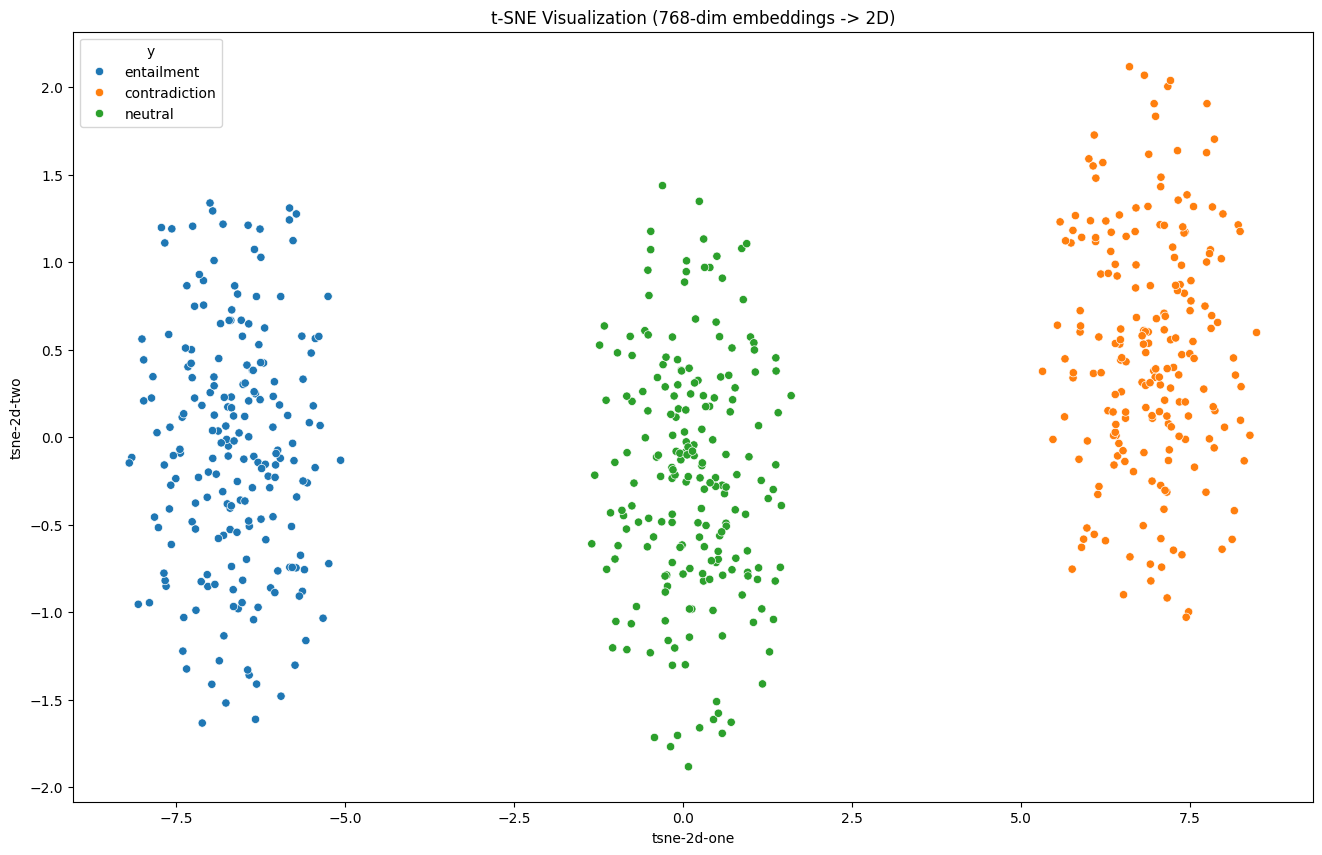

In [2]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y", data=df_subset
)
plt.title("t-SNE Visualization (768-dim embeddings -> 2D)")
plt.show()
